# Import Libraries

In [10]:

 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load data

In [11]:

df=read_csv('Iris.csv')

In [12]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
names=list(df.columns)

In [17]:
names

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [18]:
df.shape

(150, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [21]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

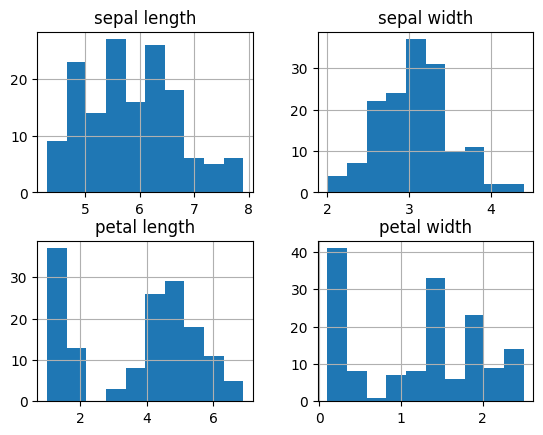

In [23]:
df.hist()

In [24]:
#df[df['species']=='setosa'].hist()


In [25]:
#df[df['species']=='versicolor'].hist()

In [26]:
#df[df['species']=='virginica'].hist()

In [27]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [28]:
import seaborn as sns

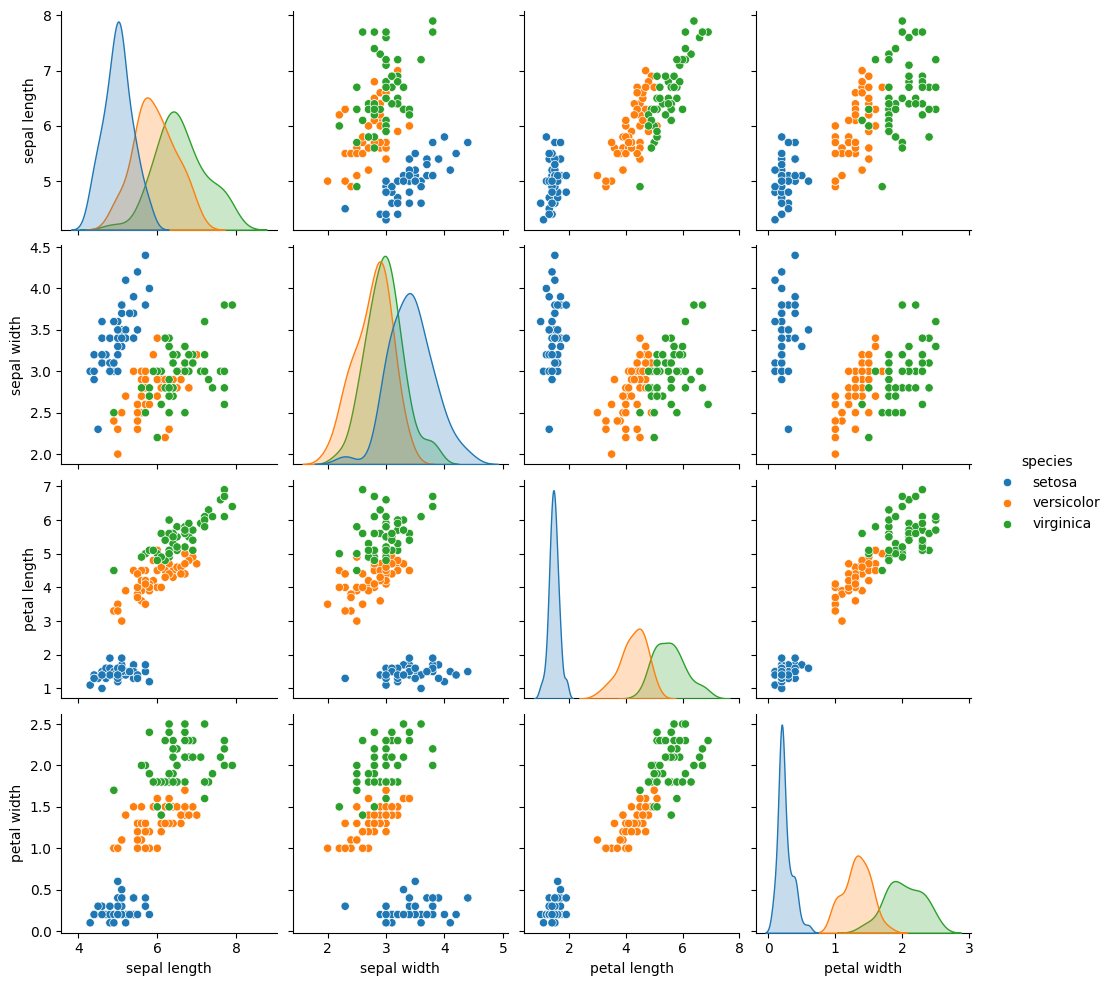

In [29]:
sns.pairplot(data=df,hue='species')

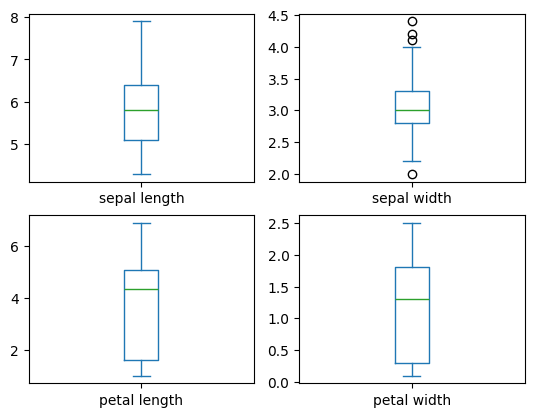

In [30]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
pyplot.show()

<Axes: >

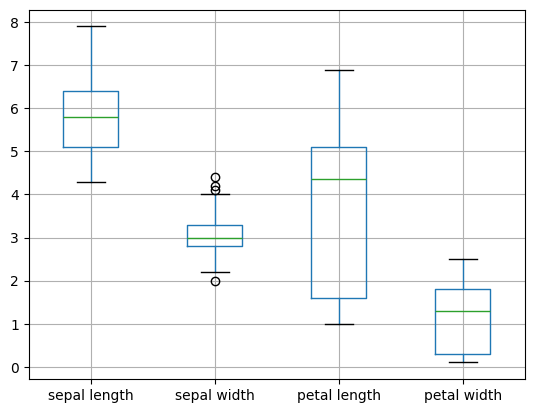

In [31]:
df.boxplot()

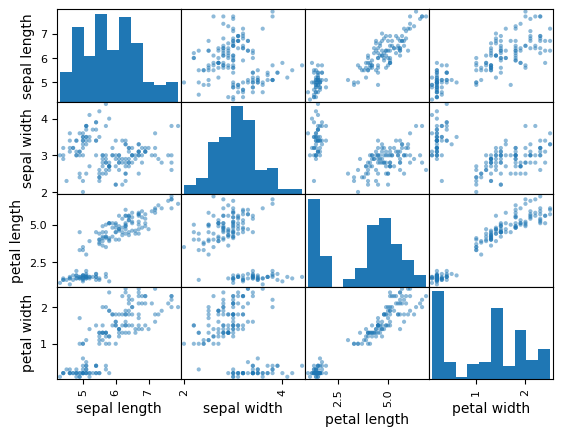

In [32]:
scatter_matrix(df)
pyplot.show()

In [33]:
# sns.pairplot(data=df)

In [34]:
x=df [names[0:4]]


In [35]:
y=df['species']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [46]:
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 
# evaluate each model in turn
results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f"
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)


LR: 0.991667 (0.016667)
LDA: 0.975000 (0.020412)
KNN: 0.975000 (0.033333)
CART: 0.975000 (0.020412)
NB: 0.983333 (0.020412)
SVM: 0.983333 (0.020412)


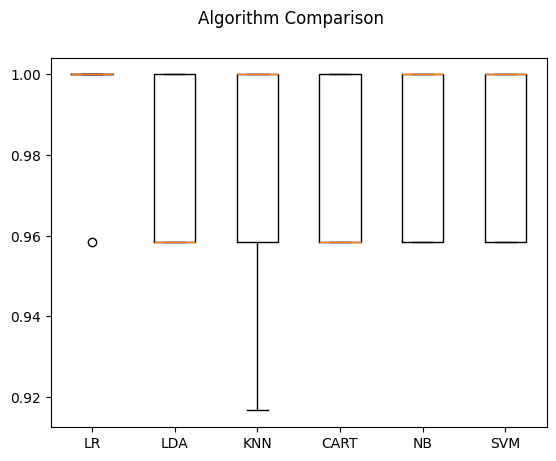

In [47]:
# Compare Algorithms 
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [48]:
# Make predictions on validation dataset 
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 
predictions = knn.predict(x_test) 


In [49]:
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

